In [7]:
# # ================================================================================================
# # 1. INSTALL DEPENDENCIES DAN IMPORT LIBRARIES
# # ================================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import warnings
# warnings.filterwarnings('ignore')

# # Machine Learning Libraries
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.impute import SimpleImputer, KNNImputer

# # Deep Learning
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# # Set random seed for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

In [2]:
# ================================================================================================
# 2. LOAD AND PREPARE DATASET
# ================================================================================================

df = pd.read_csv(r"E:\Semester 6\Data Science\footbal-rating-predict\python\fifa_players.csv")

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (17954, 51)
Dataset columns: ['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle']

First 5 rows:
           name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. E

In [3]:
# 3.1 STATISTIK DESKRIPTIF
print("\n3.1 STATISTIK DESKRIPTIF")
print("-"*50)

# Basic dataset info
print("Dataset Info:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


3.1 STATISTIK DESKRIPTIF
--------------------------------------------------
Dataset Info:
Rows: 17954
Columns: 51
Memory usage: 13.89 MB


In [4]:
# Missing values analysis
print("\nMissing Values Analysis:")
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0].head(10))


Missing Values Analysis:
                        Missing_Count  Missing_Percentage
national_jersey_number          17097           95.226690
national_team_position          17097           95.226690
national_rating                 17097           95.226690
national_team                   17097           95.226690
release_clause_euro              1837           10.231703
value_euro                        255            1.420296
wage_euro                         246            1.370168


In [5]:
# Descriptive statistics for key variables
key_vars = ['age', 'overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg']
available_key_vars = [var for var in key_vars if var in df.columns]

if available_key_vars:
    print(f"\nDescriptive Statistics for Key Variables:")
    desc_stats = df[available_key_vars].describe()
    print(desc_stats)

    # Outlier detection using IQR method
    print(f"\nOutlier Detection (IQR Method):")
    for var in available_key_vars:
        if df[var].dtype in ['int64', 'float64']:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
            print(f"{var}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


Descriptive Statistics for Key Variables:
                age     potential     height_cm
count  17954.000000  17954.000000  17954.000000
mean      25.565445     71.430935    174.946921
std        4.705708      6.131339     14.029449
min       17.000000     48.000000    152.400000
25%       22.000000     67.000000    154.940000
50%       25.000000     71.000000    175.260000
75%       29.000000     75.000000    185.420000
max       46.000000     95.000000    205.740000

Outlier Detection (IQR Method):
age: 30 outliers (0.17%)
potential: 163 outliers (0.91%)
height_cm: 0 outliers (0.00%)


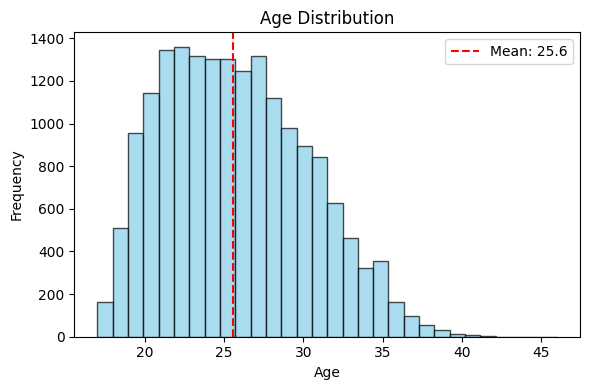

In [8]:
# 3.2 VISUALISASI EKSPLORATIF
if 'age' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

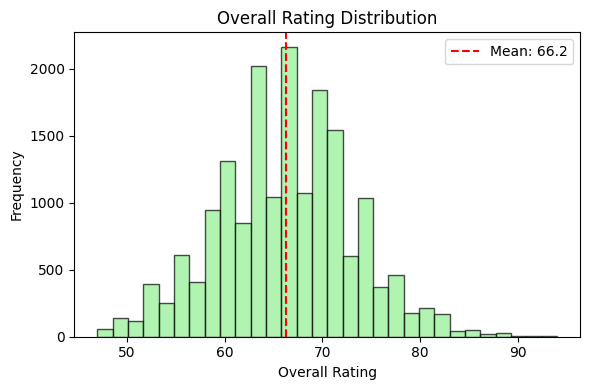

In [9]:
if 'overall_rating' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['overall_rating'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Overall Rating Distribution')
    plt.xlabel('Overall Rating')
    plt.ylabel('Frequency')
    plt.axvline(df['overall_rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["overall_rating"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

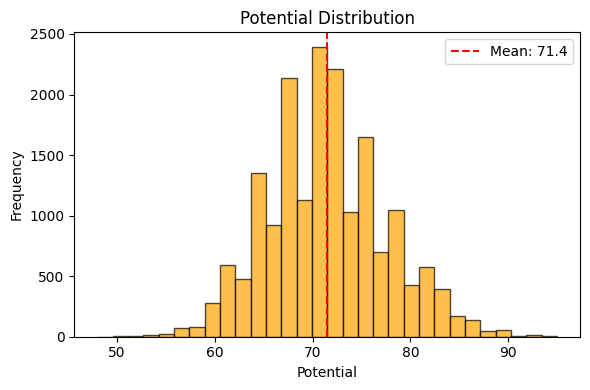

In [10]:
if 'potential' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df['potential'].dropna(), bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Potential Distribution')
    plt.xlabel('Potential')
    plt.ylabel('Frequency')
    plt.axvline(df['potential'].mean(), color='red', linestyle='--', label=f'Mean: {df["potential"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

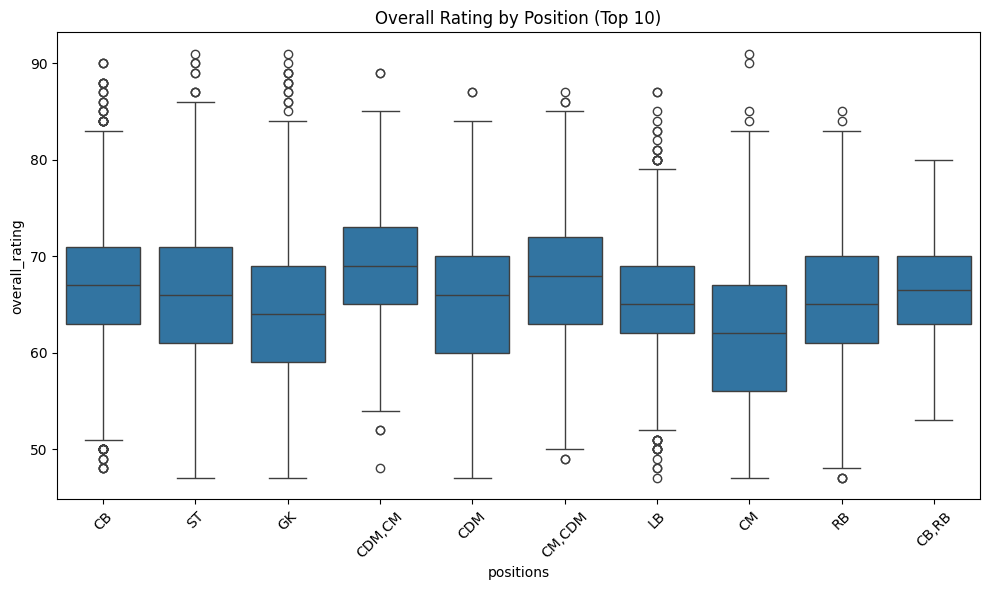

In [11]:
if 'overall_rating' in df.columns and 'positions' in df.columns:
    top_positions = df['positions'].value_counts().head(10).index
    df_top_pos = df[df['positions'].isin(top_positions)]

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_top_pos, x='positions', y='overall_rating')
    plt.title('Overall Rating by Position (Top 10)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

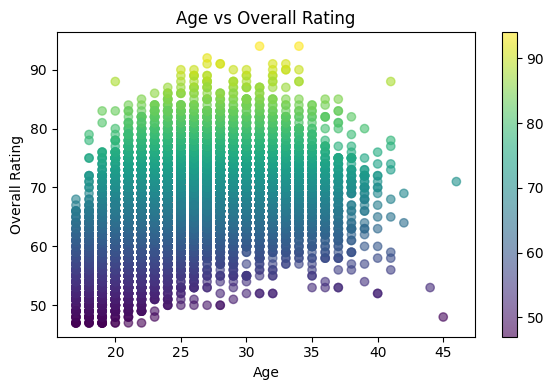

In [12]:
if 'age' in df.columns and 'overall_rating' in df.columns:
    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(df['age'], df['overall_rating'], alpha=0.6, c=df['overall_rating'], cmap='viridis')
    plt.title('Age vs Overall Rating')
    plt.xlabel('Age')
    plt.ylabel('Overall Rating')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

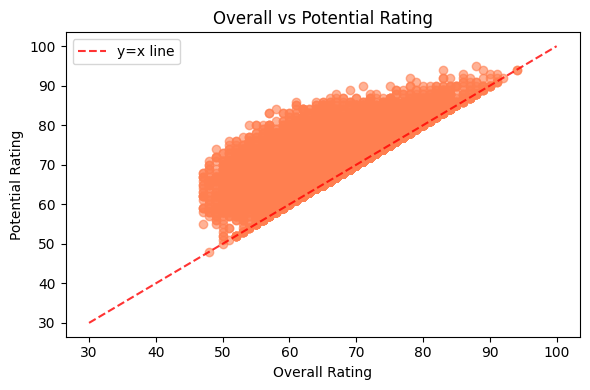

In [13]:
if 'overall_rating' in df.columns and 'potential' in df.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df['overall_rating'], df['potential'], alpha=0.6, color='coral')
    plt.plot([30, 100], [30, 100], 'r--', alpha=0.8, label='y=x line')
    plt.title('Overall vs Potential Rating')
    plt.xlabel('Overall Rating')
    plt.ylabel('Potential Rating')
    plt.legend()
    plt.tight_layout()
    plt.show()


Correlation Analysis:


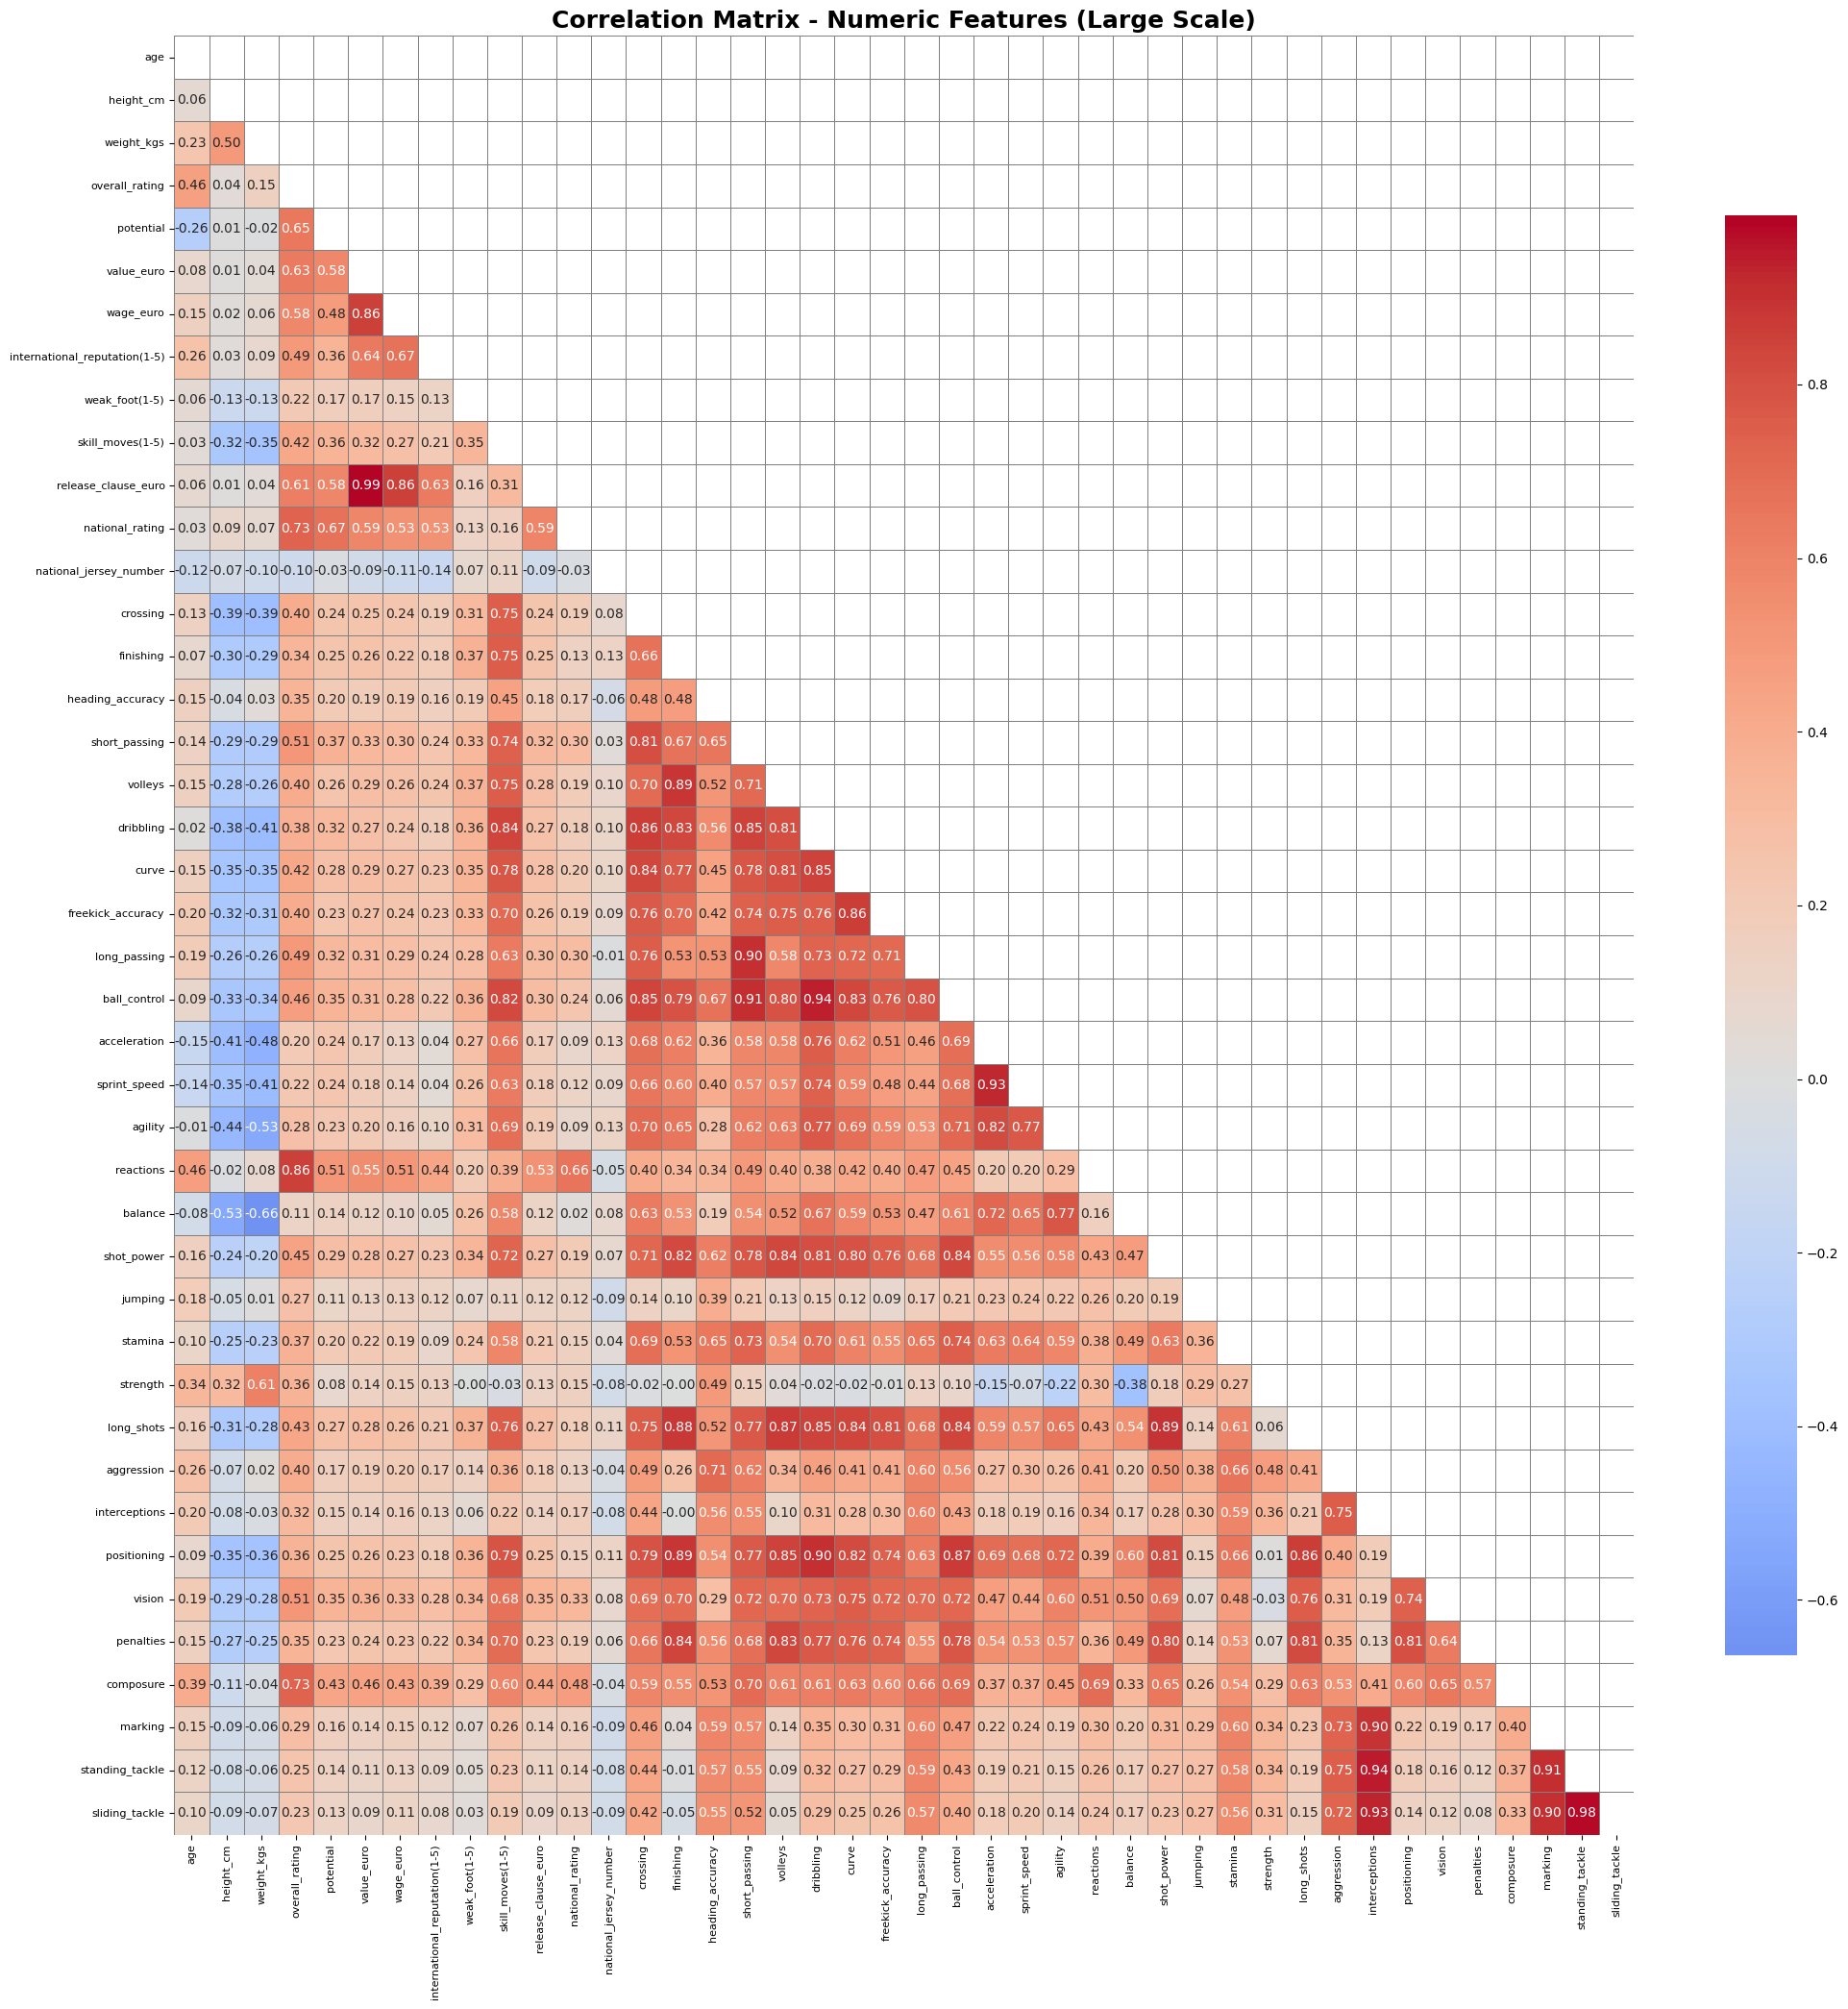


Top correlations with Overall Rating:
overall_rating         1.000000
reactions              0.855767
national_rating        0.733395
composure              0.729278
potential              0.647249
value_euro             0.630928
release_clause_euro    0.614804
wage_euro              0.577316
short_passing          0.506819
vision                 0.506812
Name: overall_rating, dtype: float64

Top correlations with Potential Rating:
potential                        1.000000
national_rating                  0.665328
overall_rating                   0.647249
release_clause_euro              0.583649
value_euro                       0.576341
reactions                        0.505011
wage_euro                        0.484029
composure                        0.434113
short_passing                    0.368106
international_reputation(1-5)    0.358874
Name: potential, dtype: float64


In [15]:
print("\nCorrelation Analysis:")

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Perbesar ukuran heatmap sesuai jumlah kolom (panjang dan lebar)
    plt.figure(figsize=(max(20, len(numeric_cols) * 0.5), max(18, len(numeric_cols) * 0.5)))

    # Matriks korelasi
    correlation_matrix = df[numeric_cols].corr()

    # Masking bagian atas
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Plot heatmap
    sns.heatmap(
        correlation_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=False,
        cbar_kws={"shrink": 0.8},
        linewidths=0.5,
        linecolor='gray'
    )

    plt.title('Correlation Matrix - Numeric Features (Large Scale)', fontsize=18, fontweight='bold')
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Menampilkan top korelasi
    if 'overall_rating' in correlation_matrix.columns:
        print("\nTop correlations with Overall Rating:")
        overall_corr = correlation_matrix['overall_rating'].abs().sort_values(ascending=False)
        print(overall_corr.head(10))

    if 'potential' in correlation_matrix.columns:
        print("\nTop correlations with Potential Rating:")
        potential_corr = correlation_matrix['potential'].abs().sort_values(ascending=False)
        print(potential_corr.head(10))


In [17]:
# ================================================================================================
# 4. DATA PREPARATION
# ================================================================================================

print("="*80)
print("DATA PREPARATION - IMPROVED VERSION")
print("="*80)

# 4.1 DATA CLEANING
print("\n4.1 DATA CLEANING")
print("-"*50)

# Make a copy for processing
df_processed = df.copy()

# Remove duplicates
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
print(f"Removed {initial_shape - df_processed.shape[0]} duplicate rows")

DATA PREPARATION - IMPROVED VERSION

4.1 DATA CLEANING
--------------------------------------------------
Removed 0 duplicate rows


In [18]:
# ================================================================================================
# 4.2 PROPER FEATURE CATEGORIZATION
# ================================================================================================

print("\n4.2 FEATURE CATEGORIZATION")
print("-"*50)

# ❌ FORBIDDEN FEATURES - TIDAK BOLEH DIPAKAI
forbidden_target = ['overall_rating', 'potential']  # Target variables
forbidden_outcome = ['value_euro', 'wage_euro', 'release_clause_euro']  # Outcome variables
forbidden_metadata = ['name', 'full_name', 'birth_date']  # Metadata
forbidden_national = ['national_team', 'national_rating', 'national_team_position', 'national_jersey_number']  # National team info

all_forbidden = forbidden_target + forbidden_outcome + forbidden_metadata + forbidden_national

print(f"🚫 Forbidden features ({len(all_forbidden)}): {all_forbidden}")

# ✅ VALID FEATURES - BOLEH DIPAKAI
# Physical & Demographic features
physical_features = ['age', 'height_cm', 'weight_kgs']

# Categorical features (will need encoding)
categorical_features = ['positions', 'nationality', 'preferred_foot', 'body_type']

# Calculated/Rating features
rating_features = ['international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)']

# Technical skill attributes (THE MOST IMPORTANT!)
technical_skills = [
    # Technical abilities
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control',
    
    # Physical abilities  
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    
    # Mental/Defensive abilities
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'composure', 'marking', 'standing_tackle', 'sliding_tackle'
]

# Check which features actually exist in the dataset
available_physical = [f for f in physical_features if f in df_processed.columns]
available_categorical = [f for f in categorical_features if f in df_processed.columns]
available_rating = [f for f in rating_features if f in df_processed.columns]
available_technical = [f for f in technical_skills if f in df_processed.columns]

print(f"\n✅ AVAILABLE VALID FEATURES:")
print(f"   Physical features ({len(available_physical)}): {available_physical}")
print(f"   Categorical features ({len(available_categorical)}): {available_categorical}")
print(f"   Rating features ({len(available_rating)}): {available_rating}")
print(f"   Technical skills ({len(available_technical)}): {available_technical}")


4.2 FEATURE CATEGORIZATION
--------------------------------------------------
🚫 Forbidden features (12): ['overall_rating', 'potential', 'value_euro', 'wage_euro', 'release_clause_euro', 'name', 'full_name', 'birth_date', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number']

✅ AVAILABLE VALID FEATURES:
   Physical features (3): ['age', 'height_cm', 'weight_kgs']
   Categorical features (4): ['positions', 'nationality', 'preferred_foot', 'body_type']
   Rating features (3): ['international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)']
   Technical skills (29): ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle'

In [19]:
# ================================================================================================
# 4.3 CREATE MODEL FEATURE SET
# ================================================================================================

print("\n4.3 CREATE MODEL FEATURE SET")
print("-"*50)

# Combine all valid numeric features for modeling
model_features_numeric = available_physical + available_rating + available_technical

print(f"Selected numeric features for modeling: {len(model_features_numeric)}")
print(f"First 10 features: {model_features_numeric[:10]}")

# We'll handle categorical features separately (need encoding)
print(f"Categorical features to encode later: {available_categorical}")

# Verify no forbidden features are included
forbidden_in_model = [f for f in model_features_numeric if f in all_forbidden]
if forbidden_in_model:
    print(f"⚠️  WARNING: Found forbidden features in model: {forbidden_in_model}")
    model_features_numeric = [f for f in model_features_numeric if f not in all_forbidden]
else:
    print("✅ No forbidden features in model set")

print(f"Final numeric features count: {len(model_features_numeric)}")


4.3 CREATE MODEL FEATURE SET
--------------------------------------------------
Selected numeric features for modeling: 35
First 10 features: ['age', 'height_cm', 'weight_kgs', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'crossing', 'finishing', 'heading_accuracy', 'short_passing']
Categorical features to encode later: ['positions', 'nationality', 'preferred_foot', 'body_type']
✅ No forbidden features in model set
Final numeric features count: 35


In [20]:
# ================================================================================================
# 4.4 HANDLE MISSING VALUES
# ================================================================================================

print("\n4.4 HANDLE MISSING VALUES")
print("-"*50)

# First, filter out rows where target variables are missing
print("Filtering rows with missing target variables...")
initial_rows = len(df_processed)

# Keep only rows where both targets are available
df_processed = df_processed[
    df_processed['overall_rating'].notna() & 
    df_processed['potential'].notna()
].copy()

filtered_rows = len(df_processed)
print(f"Rows after target filtering: {filtered_rows} (removed {initial_rows - filtered_rows} rows)")

# Check missing values in model features
if model_features_numeric:
    print(f"\nChecking missing values in model features...")
    missing_summary = df_processed[model_features_numeric].isnull().sum()
    features_with_missing = missing_summary[missing_summary > 0]
    
    if len(features_with_missing) > 0:
        print(f"Features with missing values:")
        for feature, count in features_with_missing.items():
            pct = (count / len(df_processed)) * 100
            print(f"  {feature}: {count} ({pct:.1f}%)")
        
        # Apply KNN imputation
        print(f"\nApplying KNN imputation...")
        from sklearn.impute import KNNImputer
        
        imputer = KNNImputer(n_neighbors=5)
        df_processed[model_features_numeric] = imputer.fit_transform(df_processed[model_features_numeric])
        
        # Verify imputation worked
        remaining_missing = df_processed[model_features_numeric].isnull().sum().sum()
        print(f"✅ KNN imputation completed. Remaining missing values: {remaining_missing}")
        
    else:
        print("✅ No missing values found in numeric features")


4.4 HANDLE MISSING VALUES
--------------------------------------------------
Filtering rows with missing target variables...
Rows after target filtering: 17954 (removed 0 rows)

Checking missing values in model features...
✅ No missing values found in numeric features
